In [263]:
import pandas as pd                  
import os                            
from pathlib import Path             
from rapidfuzz import fuzz, process  
import matplotlib.pyplot as plt      



In [264]:
data_path = Path(r"C:\Users\Lenovo\Master_Thesis_xlstm\new_workshop\task_munchen\works Aufgabe")

# Laden der Referenzdaten

In [265]:
Beispielobjekte = pd.read_excel(data_path / "Beispielobjekte.xlsx", sheet_name="Anlagen")
Beispielobjekte.head()

,Gebäude-ID,Anlagentyp,Anlagen-ID,Bauteil der Anlage,Anlagenname,Untergewerk-ID,Untergewerk,AKS-Bezeichnung,Kostengruppe,Kostengruppenbezeichnung,Anzahl,Hinweis Preisermittlung,Merkmale,Verbandsnummer
0,2026,Anlage,71610,NaN,Kleinkaltwassersatz 109 kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:109 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
1,2026,Anlage,71611,NaN,Kleinkaltwassersatz 237kW,1246,434,Kompressionskältemaschine,430,Lufttechnische Anlagen,1.0,NaN,Kälteleistung:237 kW; Kältemittel:R410A; Kälte...,434.01.02.000.01.01
2,2026,Anlage,71612,NaN,Kältenetz Dach - Deckenkühlung & Fancoil,1250,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,Anzahl Heizkreise:5 Stk.; Heizkreis (Art):dyna...,434.03.01.000.01.02
3,2026,Bauteil,71624,71612.0,Ausdehnungsgefäß Dach,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,"max. zulässiger Betriebsdruck:; Volumen:0,05 m3;",NaN
4,2026,Bauteil,71613,71612.0,Ausdehnungsgefäß Kälteverteiler 1. OG,1526,434,Verteilnetz / Pumpen - Kälteerzeugung,430,Lufttechnische Anlagen,1.0,NaN,max. zulässiger Betriebsdruck:10 bar; Volumen:...,NaN


# Ermittlung der relevanten (wichtigen) Anlagen über alle Gebäude hinweg

In [266]:
num_buildings = Beispielobjekte['Gebäude-ID'].nunique()
print(f"Number of unique buildings: {num_buildings}")

thresholds = [0.50, 0.6, 0.70, 0.75, 0.85, 0.90]
threshold_counts = {f"{int(t*100)}%": int(num_buildings * t) for t in thresholds}

filtered_systems = {
    label: system_counts[system_counts['Number_of_Buildings'] >= count].reset_index(drop=True)
    for label, count in threshold_counts.items()
}

for label, df in filtered_systems.items():
    print(f"\n=== Systems in at least {label} of buildings (≥ {threshold_counts[label]} buildings) ===")
    display(df)

filtered_system_names = {
    label: df['Anlagenname'].tolist()
    for label, df in filtered_systems.items()
}

print("\nSystem names in at least 60% of buildings:")
print(filtered_system_names["60%"])


Number of unique buildings: 32

=== Systems in at least 50% of buildings (≥ 16 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



=== Systems in at least 60% of buildings (≥ 19 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



=== Systems in at least 70% of buildings (≥ 22 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



=== Systems in at least 75% of buildings (≥ 24 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



=== Systems in at least 85% of buildings (≥ 27 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



=== Systems in at least 90% of buildings (≥ 28 buildings) ===


,Anlagenname,Number_of_Buildings
0,Raumbeleuchtung,31
1,Verlegesysteme,31
2,Pumpen,30
3,Kabel,30
4,Stromzähler,30
5,Leitungen,29
6,Abläufe,29
7,Wärmeverteilnetz,29
8,Blitzschutzanlage,29
9,Sicherheitsbeleuchtungsanlage,28



System names in at least 60% of buildings:
['Raumbeleuchtung', 'Verlegesysteme', 'Pumpen', 'Kabel', 'Stromzähler', 'Leitungen', 'Abläufe', 'Wärmeverteilnetz', 'Blitzschutzanlage', 'Sicherheitsbeleuchtungsanlage', 'Außenfenster mit Kipp- oder Drehflügel', 'Dachrinnen', 'Rohrleitungen', 'Heizungsverteiler', 'Trennstellen', 'Wasserfilter', 'Geneigtes Dach', 'Wärmemengenzähler', 'GA-Schaltschränke', 'Wasserzähler', 'Rauchwärmeabzugsanlage (RWA)', 'Feldgeräte (Aktor)', 'Feldgeräte (Sensor)', 'DDC', 'Handfeuerlöscher', 'Membranausdehnungsgefäß (MAG)', 'Niederspannungshauptverteiler', 'Leuchte', 'Wärmetauscher', 'Zentralgerät', 'NS-Unterverteiler', 'Automationssystem']


# Visualisierung unterschiedlicher Klassenzahlen über verschiedene Schwellenwerte hinweg

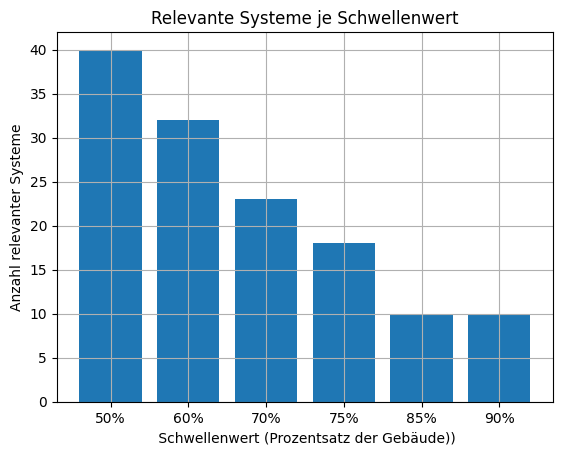

In [267]:
threshold_sizes = {label: len(df) for label, df in filtered_systems.items()}

plt.bar(threshold_sizes.keys(), threshold_sizes.values())
plt.xlabel(" Schwellenwert (Prozentsatz der Gebäude))")
plt.ylabel("Anzahl relevanter Systeme")
plt.title("Relevante Systeme je Schwellenwert")
plt.grid(True)
plt.show()


# Laden der Kundendaten

In [268]:
kundendatei = pd.read_excel(data_path / "Kundendatei.xlsx", sheet_name="Kundenobjekte")
kundendatei.head()

,WirtEinh,EQ_übergeordnet,Equipment,EQ-Bezeichnung,EQ-Klasse,EQ-Klasse-Bezeichnung,Gewerk,Anlagenausprägung,EQ-Menge,EQ-Merkmal_001,...,EQ-Merkmal_043,EQ-Merkmal_044,EQ-Merkmal_045,EQ-Merkmal_046,EQ-Merkmal_047,EQ-Merkmal_048,EQ-Merkmal_049,EQ-Merkmal_050,EQ-Merkmal_051,EQ-Merkmal_052
0,21083,NaN,1000005794,Schutzraumlüftung - Mitt.(Außer Betrieb),31211,Lüftungsanlagen,RLT,Schutzraumlüft. ohne Sandfilt.,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21083,NaN,1000005932,RLT Batterieraum alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21083,NaN,1000005934,RLT Gleichr. alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21083,NaN,1000025596,"Gebäude-Blitzschutz-, Erdungsanl., Pot.",3330,Blitzschutz-/Erdungsanlage,Elektro Blitzschutz,Blitzschutz/Erdung Gebäude,1,Ableiter Anzahl aussen: 11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21083,NaN,1000026066,Beschallungs-/Sprechanlagen,3520,Elektroakustische Anlagen,Haustechn Einricht,Beschallungsanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyse und Gruppierung der Systeme nach Gebäuden

In [284]:
first_col = kundendatei.columns[0]

unique_buildings = kundendatei[first_col].dropna().unique()

unique_buildings_sorted = sorted(unique_buildings)

print(f"Total unique buildings (WirtEinh): {len(unique_buildings_sorted)}")
print("List of building IDs:")
print(unique_buildings_sorted)


building_systems = (
    kundendatei[['WirtEinh', 'EQ-Bezeichnung']]
    .dropna()
    .groupby('WirtEinh')['EQ-Bezeichnung']
    .apply(lambda x: sorted(set(x)))  # unique + sorted
    .reset_index()
)

building_systems

for index, row in building_systems.iterrows():
    building_id = row['WirtEinh']
    system_list = row['EQ-Bezeichnung']
    
    #print(f"\nSystems in Building {building_id}:")
    #print(system_list)



Total unique buildings (WirtEinh): 7
List of building IDs:
[np.int64(15859), np.int64(18925), np.int64(21083), np.int64(22225), np.int64(26287), np.int64(28580), np.int64(30009)]


# Schleife und unscharfer Abgleich 

In [279]:


reference_systems = filtered_system_names["60%"]


similarity_threshold = 40 
def clean_name(name):
    import re
    name = re.sub(r'\bR[.\s]?\d+\w*\b', '', name)  # Remove room refs like R.503a
    name = re.sub(r'[^\w\s]', '', name)  # Remove punctuation
    return name.strip().lower()

fuzzy_matches_per_building = []

for index, row in building_systems.iterrows():
    building_id = row['WirtEinh']
    customer_systems = row['EQ-Bezeichnung']
    
    matched = []
    unmatched = []
    
    for system in customer_systems:
        match, score, _ = process.extractOne(system, reference_systems, scorer=fuzz.token_sort_ratio)
        if score >= similarity_threshold:
            matched.append((system, match, score))
        else:
            unmatched.append(system)
    
    fuzzy_matches_per_building.append({
        "Building_ID": building_id,
        "Matched_Systems": matched,
        "Unmatched_Systems": unmatched
    })


for result in fuzzy_matches_per_building:
    print(f"\n--- Building {result['Building_ID']} ---")
    print(" Matched:")
    for sys, ref, score in result["Matched_Systems"]:
        print(f"  - {sys} → {ref} ({score}%)")
    print(" Unmatched:")
    for sys in result["Unmatched_Systems"]:
        print(f"  - {sys}")



--- Building 15859 ---
 Matched:
  - Abluftanlage, TRAFO 4 → Blitzschutzanlage (47.36842105263158%)
  - Abluftanlage, TRAFO 5 → Blitzschutzanlage (47.36842105263158%)
  - Abluftanlage, TRAFO 6 → Blitzschutzanlage (47.36842105263158%)
  - Ablüfter, R.504 → Abläufe (45.45454545454546%)
  - Abwasserleitungsanlage → Sicherheitsbeleuchtungsanlage (58.82352941176471%)
  - Abwasserleitungsanlage KatS-Gebäude → Sicherheitsbeleuchtungsanlage (46.875%)
  - Abwasserleitungsanlage RZ → Sicherheitsbeleuchtungsanlage (55.55555555555556%)
  - Abwasserleitungsanlagen → Sicherheitsbeleuchtungsanlage (57.692307692307686%)
  - Außenbel. ortsfest → Abläufe (40.0%)
  - BK-Anlage → Blitzschutzanlage (46.15384615384615%)
  - BMA 2 Erweiterungsbau Kollo-Ra → Sicherheitsbeleuchtungsanlage (40.67796610169492%)
  - BMA-Zentrale 1 - RLT Geleichri → Zentralgerät (42.85714285714286%)
  - Batteriehandl. → Dachrinnen (41.666666666666664%)
  - Beheizungseinr., Dachentwässerung u. ä. → Heizungsverteiler (42.8571428571

## Speichern der nicht übereinstimmenden Systeme 

In [281]:
unmatched_systems_per_building = {
    result["Building_ID"]: result["Unmatched_Systems"]
    for result in fuzzy_matches_per_building
}

for building_id, unmatched_list in unmatched_systems_per_building.items():
    print(f"\nBuilding {building_id} - Unmatched Systems:")
    for system in unmatched_list:
        print(f"  - {system}")



Building 15859 - Unmatched Systems:
  - #L011_x_x_x9_Bauerbergweg Raum 214
  - #L013_x_x_x_Bauerbergweg Raum 214
  - #Z011_x_x_x9_Bauerbergweg Raum 214
  - #Z013_x_x_x_Bauerbergweg Raum 214
  - Ablüfter, R.503a (Batterieraum)
  - Abw-Hebeanl. 1
  - Abw-Hebeanl. 1 RZ
  - Abw-Hebeanl. 2 RZ
  - Abwasserhebenanl. Teeküche R 413a
  - BMA 1 Erweiterungsbau              (VdS)
  - BMA 2 OBZI 5.OG
  - BMA 5.OG, Batterieraum             (VdS)
  - BSK RLT-Anl. 10
  - BSK RLT-Anl. 11
  - BSK RLT-Anl. 12
  - BSK RLT-Anl. 30
  - BSK RLT-Anl. 4
  - BSK RLT-Anl. 5
  - BSK RLT-Anl. 8
  - BSK RLT-Anl. 9
  - BSK-RLT-Anlage, R.505
  - Behinderten WC Notruf   RZ
  - Behinderten WC Notruf RZ
  - EBK5
  - EMA 118    RZ      ABGS
  - Entwässerungspumpe
  - F002_04_414b_ _T-Home
  - F004_E_75_x_Flur
  - F019_x_x_x_Bauerbergweg Raum 414
  - F020_x_x_xktiv F69_Raum 414 inaktiv
  - F021_x_x_x_Bauerbergweg Raum 412c
  - F02_Bauerbergweg Raum 1a Haupteing vorn
  - F039_x_x_x4_Bauerbergweg Raum 17
  - F03_Bauerberg

In [283]:
#unmatched_systems_per_building

### Vorbereitung der Katalogdaten

In [273]:
EPcatalog = pd.read_excel(data_path / "EP_Katalog.xlsx", sheet_name="EP Liste")

catalog_names = EPcatalog['Kurztext / Bezeichnung'].dropna().astype(str).tolist()
catalog_codes = EPcatalog['Artikelnummer'].astype(str).tolist()

In [274]:
catalog_lookup = list(zip(catalog_names, catalog_codes))

In [282]:
#catalog_lookup

# Unscharfer Abgleich der nicht übereinstimmenden Systeme zur Ermittlung der Artikelnummern

In [278]:
catalog_names = EPcatalog['Kurztext / Bezeichnung'].dropna().unique()
catalog_codes = EPcatalog.set_index('Kurztext / Bezeichnung')['Artikelnummer'].to_dict()

#unmatched_systems = unmatched_systems_per_building = {
 #   result["Building_ID"]: result["Unmatched_Systems"]
  #  for result in fuzzy_matches_per_building
#}

def match_system_to_catalog(system_name, catalog_list, threshold=30):
    match, score, _ = process.extractOne(system_name, catalog_list, scorer=fuzz.token_sort_ratio)
    if score >= threshold:
        artikelnummer = catalog_codes.get(match, "Not found")
        return system_name, match, score, artikelnummer
    else:
        return system_name, None, score, None

# Apply to all unmatched systems
matched_results = [match_system_to_catalog(system, catalog_names) for system in unmatched_customer_systems]

# Display results
for orig, match, score, code in matched_results:
    if match:
        print(f" {orig} → {match} (score: {score}) → Code: {code}")
    else:
        print(f" {orig} → No good match found (score: {score})")


valid_matches_df = pd.DataFrame([
    {'Original': orig, 'Matched': match, 'Score': round(score, 2), 'Artikelnummer': code}
    for orig, match, score, code in matched_results
    if match and code
])


print("\n Valid matches table:")
display(valid_matches_df.style.set_caption("Valid Matches")
        .set_table_attributes('style="border:1px solid black;"')
        .set_properties(**{'border': '1px solid black', 'padding': '5px'}))

 Blitzschutz Rechenzentrum → 446 - Blitzschutz- und Erdungsanlagen (score: 51.61290322580645) → Code: nan
 Rauchabzugsanl. Nord,              (VdS) → 439 - Rauchwärmeabzugsanlage (RWA) - CO2-Patrone (score: 50.66666666666666) → Code: 439.02.01.000.02.00
 Wassermelder (A) → 412 - Wasserzähler (score: 58.82352941176471) → Code: 412.03.01.230.00.00
 Trinkwasserspender Eden → 474 - Sprinklerpumpen - Elektro (score: 44.44444444444444) → Code: 474.01.04.204.02.00
 Videoüberwachungsanlage → 443 - Maximumüberwachungsanlagen (score: 69.0909090909091) → Code: 443.03.01.000.00.00
 Splitklimagerät, R.120 → 432 - Teilklimaanlagen (score: 45.45454545454546) → Code: nan

 Valid matches table:


,Original,Matched,Score,Artikelnummer
0,Blitzschutz Rechenzentrum,446 - Blitzschutz- und Erdungsanlagen,51.610000,nan
1,"Rauchabzugsanl. Nord, (VdS)",439 - Rauchwärmeabzugsanlage (RWA) - CO2-Patrone,50.670000,439.02.01.000.02.00
2,Wassermelder (A),412 - Wasserzähler,58.820000,412.03.01.230.00.00
3,Trinkwasserspender Eden,474 - Sprinklerpumpen - Elektro,44.440000,474.01.04.204.02.00
4,Videoüberwachungsanlage,443 - Maximumüberwachungsanlagen,69.090000,443.03.01.000.00.00
5,"Splitklimagerät, R.120",432 - Teilklimaanlagen,45.450000,nan
